# Importation des librairies

In [36]:
import nltk
import pandas as pd
nltk.download('stopwords')
nltk.download('wordnet')
from nltk.corpus import stopwords
from nltk.probability import FreqDist
from nltk import bigrams
from nltk.util import ngrams
from wordcloud import WordCloud,STOPWORDS
import matplotlib.pyplot as plt
import itertools
import collections
import networkx as nx
# import re
# from nltk.stem import PorterStemmer
# import nltk as nlp
# import string
# import copy

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\irvin\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\irvin\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


# importation du dataframe

In [37]:
df = pd.read_csv('caf/articles1.csv')
date_title = pd.DataFrame(data=df.dropna(subset=['pub_date', 'title']), columns=['pub_date', 'title'])

date_title

,pub_date,title
0,2023-11-09,ChatGPT and other Large Language Models for Cy...
1,2023-11-02,Emergent (In)Security of Multi-Cloud Environments
2,2023-11-02,A Review of Digital Twins and their Applicatio...
3,2023-11-06,Hacking Cryptographic Protocols with Advanced ...
4,2023-11-05,The New Frontier of Cybersecurity: Emerging Th...
...,...,...
2021,2020-01-01,Cybersecurity risks of blockchain technology
2022,2018-01-01,CSIRT s and global cybersecurity: How technica...
2023,2019-01-01,Curricular foundations for cybersecurity
2024,2019-01-01,CNDS-cybersecurity: issues and challenges in A...


# Nettoyage supplémentaire
- mise en minuscule
- retrait des stopwords
- retrait des ponctuations

In [38]:
# definition de la langue, des mots à exclure et des ponctuations à exclure
stop = set(stopwords.words("english"))
#punct = set(string.punctuation)
punct = {'!',
 '"',
 '#',
 '$',
 '%',
 '&',
 "'",
 '(',
 ')',
 '*',
 '+',
 ',',
 '.',
 '/',
 ':',
 ';',
 '<',
 '=',
 '>',
 '?',
 '@',
 '[',
 '\\',
 ']',
 '^',
 '`',
 '{',
 '”',
 '--',
  '…',
 '|',
 '}',
 '~'}


In [39]:
# definition de la fonction de nettoyage
def clean(doc):
    stop_free=" ".join([i for i in doc.lower().split() if i not in stop])
    punct_free=''.join(j for j in stop_free if j not in punct)
    return punct_free

# nettoyage de title et insertion dans la nouvelle colonne cleaned_title
date_title['cleaned_title'] = df['title'].astype(str).apply(clean)
date_title
# cleaned_title = [clean(str(date_title.iloc[i, 1])) for i in range(0, date_title.shape[0])]
# cleaned_title

,pub_date,title,cleaned_title
0,2023-11-09,ChatGPT and other Large Language Models for Cy...,chatgpt large language models cybersecurity sm...
1,2023-11-02,Emergent (In)Security of Multi-Cloud Environments,emergent insecurity multi-cloud environments
2,2023-11-02,A Review of Digital Twins and their Applicatio...,review digital twins application cybersecurity...
3,2023-11-06,Hacking Cryptographic Protocols with Advanced ...,hacking cryptographic protocols advanced varia...
4,2023-11-05,The New Frontier of Cybersecurity: Emerging Th...,new frontier cybersecurity emerging threats in...
...,...,...,...
2021,2020-01-01,Cybersecurity risks of blockchain technology,cybersecurity risks blockchain technology
2022,2018-01-01,CSIRT s and global cybersecurity: How technica...,csirt global cybersecurity technical experts s...
2023,2019-01-01,Curricular foundations for cybersecurity,curricular foundations cybersecurity
2024,2019-01-01,CNDS-cybersecurity: issues and challenges in A...,cnds-cybersecurity issues challenges asean cou...


# NLP
- stemming (abandonné parce que les mots obtenus ne sont pas valides)
- tokenization + lemmatization

In [40]:
#stemming
# pst = PorterStemmer()
# date_title['lemmed_title'] = date_title['cleaned_title'].apply(pst.stem)

#lemmatization
def lemmatize_title(text):
    # Tokenizing the text
    tokens = nltk.word_tokenize(text)
    # Lemmatizing each token
    lemmatized_tokens = [nltk.WordNetLemmatizer().lemmatize(token) for token in tokens]
    # Joining the lemmatized tokens into a single string
    lemmatized_text = " ".join(lemmatized_tokens)
    return lemmatized_text

#creating a new column for the lemmatized titles
date_title['lemmatized_title'] = date_title['cleaned_title'].apply(lemmatize_title)

date_title

,pub_date,title,cleaned_title,lemmatized_title
0,2023-11-09,ChatGPT and other Large Language Models for Cy...,chatgpt large language models cybersecurity sm...,chatgpt large language model cybersecurity sma...
1,2023-11-02,Emergent (In)Security of Multi-Cloud Environments,emergent insecurity multi-cloud environments,emergent insecurity multi-cloud environment
2,2023-11-02,A Review of Digital Twins and their Applicatio...,review digital twins application cybersecurity...,review digital twin application cybersecurity ...
3,2023-11-06,Hacking Cryptographic Protocols with Advanced ...,hacking cryptographic protocols advanced varia...,hacking cryptographic protocol advanced variat...
4,2023-11-05,The New Frontier of Cybersecurity: Emerging Th...,new frontier cybersecurity emerging threats in...,new frontier cybersecurity emerging threat inn...
...,...,...,...,...
2021,2020-01-01,Cybersecurity risks of blockchain technology,cybersecurity risks blockchain technology,cybersecurity risk blockchain technology
2022,2018-01-01,CSIRT s and global cybersecurity: How technica...,csirt global cybersecurity technical experts s...,csirt global cybersecurity technical expert su...
2023,2019-01-01,Curricular foundations for cybersecurity,curricular foundations cybersecurity,curricular foundation cybersecurity
2024,2019-01-01,CNDS-cybersecurity: issues and challenges in A...,cnds-cybersecurity issues challenges asean cou...,cnds-cybersecurity issue challenge asean country


In [41]:
# Get the list of titles
titles = date_title['lemmatized_title'].tolist()

# Concatenate the titles
concat_titles = " ".join(titles)
concat_titles

'chatgpt large language model cybersecurity smart grid application emergent insecurity multi-cloud environment review digital twin application cybersecurity based artificial intelligence hacking cryptographic protocol advanced variational quantum attack new frontier cybersecurity emerging threat innovation intell-dragonfly cybersecurity attack surface generation engine based artificial intelligence-generated content technology acwa ai-driven cyber-physical testbed intelligent water system split-ner named entity recognition via two question-answering-based classification artificial intelligence ethic education cybersecurity challenge opportunity focus group report quantum-inspired anomaly detection qubo formulation bit insight exploring network traffic traffic matrix heavy-tailed data unscrambling rectification adversarial attack transferability across computer network ic-secure intelligent system assisting security expert generating playbook automated incident response sok security o -

# Analyse
- faire ressortir les mots uniques
- frequence des mots
- evolution du nombre d'article sur la cybersecurite par annee
- frequence des mots sur chaque année (trend analysis)

In [42]:
# Split the titles into words
words = concat_titles.split()

# Count the number of occurrences of each word
word_counts = FreqDist(words)
word_counts

FreqDist({'cybersecurity': 1214, 'learning': 215, 'system': 169, 'detection': 167, 'security': 148, 'attack': 137, 'risk': 122, 'network': 118, 'cyber': 115, 'using': 113, ...})

In [43]:
#creating a dataframe for the different words in all the dataset
freq = pd.DataFrame(word_counts.items(), columns=['word', 'frequence']).sort_values(by='frequence', ascending=False)
freq.to_csv('frequence_all_words.csv', index=False)
freq

,word,frequence
4,cybersecurity,1214
116,learning,215
43,system,169
61,detection,167
80,security,148
...,...,...
1649,honeytokens,1
1648,revisited,1
1646,stacked,1
1645,two-stage,1


In [44]:
#retrieving the top 100 words
top = pd.DataFrame(data=freq.head(100))#.reset_index(drop=True)
top.to_csv('top_100_all_words.csv', index=False)
top

,word,frequence
4,cybersecurity,1214
116,learning,215
43,system,169
61,detection,167
80,security,148
...,...,...
122,science,21
208,knowledge,21
598,design,21
343,blockchain,21


<Axes: xlabel='word'>

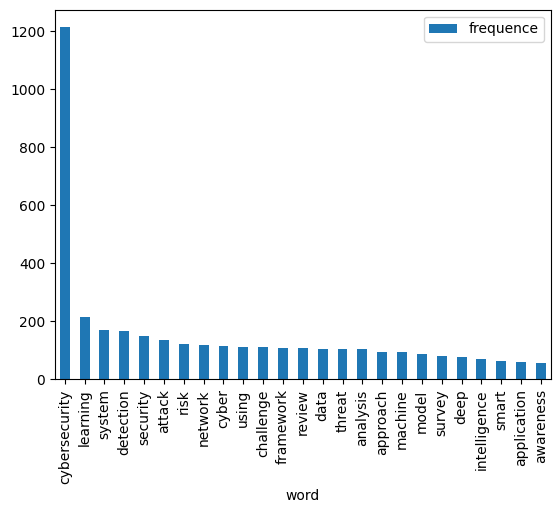

In [45]:
top.head(25).plot(kind='bar', x='word')

In [46]:
#getting the years
year = pd.to_datetime(date_title["pub_date"]).dt.year
year

0       2023
1       2023
2       2023
3       2023
4       2023
        ... 
2021    2020
2022    2018
2023    2019
2024    2019
2025    2017
Name: pub_date, Length: 2001, dtype: int32

In [47]:
#the number of articles about cybersecurity each year
article_number = year.value_counts()
# article_number.to_csv('acticle_number_by_year.csv')
article_number

pub_date
2021    374
2023    334
2022    325
2020    270
2019    208
2018    150
2017    104
2016     59
2015     45
2014     36
2011     22
2013     21
2012     16
2010     12
2009      8
2005      6
2008      6
2003      3
2002      1
2007      1
Name: count, dtype: int64

<Axes: xlabel='pub_date'>

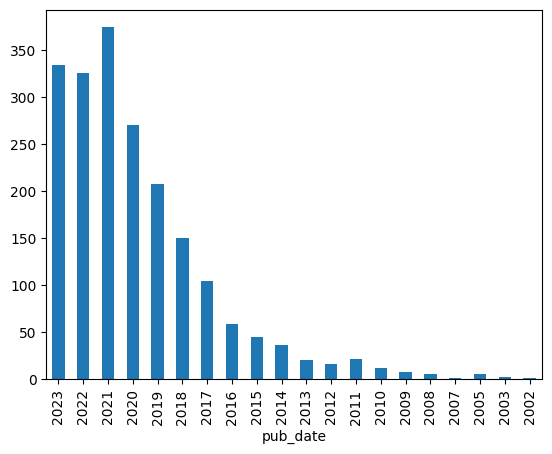

In [48]:
article_number.sort_index(ascending=False).plot(kind='bar', x='pub_date')

### pourquoi y a t'il un pic en 2021 ?
- " La durée moyenne de publication d'un article scientifique varie en fonction de plusieurs facteurs, tels que le domaine de recherche, la revue dans laquelle l'article est soumis, et la qualité de l'article. En général, la durée moyenne de publication est d'environ 12 à 18 mois."
- les articles inspirés par le nombre records de cyber attaques en 2019 dus à la pandémie de covid n'ont pu être publiés qu'au cours de l'année 2021 (en prenant en compte le temps d'écriture de l'article)

# le word cloud

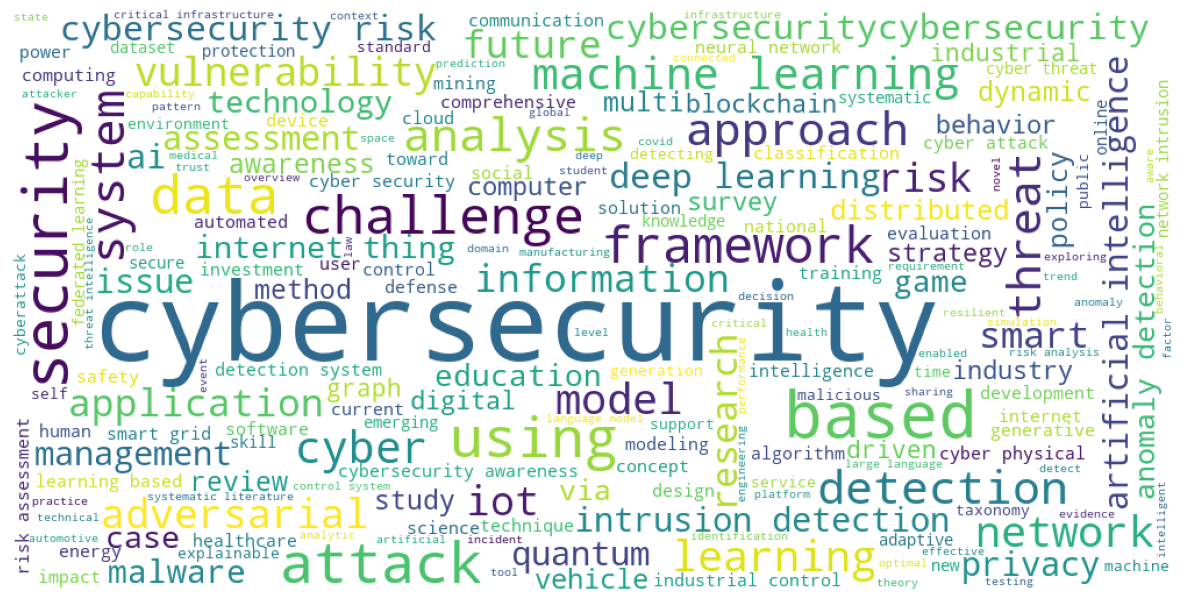

In [49]:
#plot wordcloud
wordcloud= WordCloud(width=1000,height=500, stopwords=STOPWORDS, background_color='white').generate(''.join(date_title['lemmatized_title']))
plt.figure(figsize=(15,8))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

### PLUS DE DONNEES

In [50]:
# adding the year columns in the dataframe
date_title['year'] = pd.to_datetime(date_title['pub_date']).dt.year
date_title.to_csv('final_data_frame.csv', index=False)
date_title

,pub_date,title,cleaned_title,lemmatized_title,year
0,2023-11-09,ChatGPT and other Large Language Models for Cy...,chatgpt large language models cybersecurity sm...,chatgpt large language model cybersecurity sma...,2023
1,2023-11-02,Emergent (In)Security of Multi-Cloud Environments,emergent insecurity multi-cloud environments,emergent insecurity multi-cloud environment,2023
2,2023-11-02,A Review of Digital Twins and their Applicatio...,review digital twins application cybersecurity...,review digital twin application cybersecurity ...,2023
3,2023-11-06,Hacking Cryptographic Protocols with Advanced ...,hacking cryptographic protocols advanced varia...,hacking cryptographic protocol advanced variat...,2023
4,2023-11-05,The New Frontier of Cybersecurity: Emerging Th...,new frontier cybersecurity emerging threats in...,new frontier cybersecurity emerging threat inn...,2023
...,...,...,...,...,...
2021,2020-01-01,Cybersecurity risks of blockchain technology,cybersecurity risks blockchain technology,cybersecurity risk blockchain technology,2020
2022,2018-01-01,CSIRT s and global cybersecurity: How technica...,csirt global cybersecurity technical experts s...,csirt global cybersecurity technical expert su...,2018
2023,2019-01-01,Curricular foundations for cybersecurity,curricular foundations cybersecurity,curricular foundation cybersecurity,2019
2024,2019-01-01,CNDS-cybersecurity: issues and challenges in A...,cnds-cybersecurity issues challenges asean cou...,cnds-cybersecurity issue challenge asean country,2019


In [51]:
def concat_titles(row):
    return " ".join(row["lemmatized_title"])

group_title_by_year = date_title.groupby("year").apply(concat_titles).squeeze()
group_title_by_year = group_title_by_year.to_frame()
group_title_by_year = group_title_by_year.reset_index(level=0)
group_title_by_year.columns = ["year", "title"]
# group_title_by_year = pd.DataFrame({group_title_by_year})
group_title_by_year

,year,title
0,2002,issue cybersecurity understanding potential ri...
1,2003,securing henp computing facility least effort ...
2,2005,creating national framework cybersecurity anal...
3,2007,framework linking cybersecurity metric modelin...
4,2008,cybersecurity challenge cybersecurity strategy...
5,2009,approach solving cybercrime cybersecurity road...
6,2010,economics cybersecurity principle policy optio...
7,2011,doctrine cybersecurity guideline usable cybers...
8,2012,cybersecurity risk cybersecurity new challenge...
9,2013,executive order -- improving critical infrastr...


In [52]:
#how to get yhe year of a group of title
group_title_by_year.iloc[2,0]

2005

In [53]:
#how to get a list of word and frequences from a year
FreqDist(str(group_title_by_year.iloc[4,1]).split())

FreqDist({'cybersecurity': 6, 'assessment': 2, 'research': 2, 'challenge': 1, 'strategy': 1, 'query': 1, 'methodology': 1, 'vulnerability': 1, 'scada': 1, 'system': 1, ...})

In [54]:
#now the process of storing a word, it's frequence, and the year he appeared
#creating a dataframe
frequences_grouped_by_year = pd.DataFrame()
#initializing 3 empty list
L1=[]
L2=[]
L3=[]
for i in range(group_title_by_year.shape[0]):
        var1 = FreqDist(str(group_title_by_year.iloc[i,1]).split())
        col1 = list(var1.keys())
        L1.extend(col1)
        col2 = list(var1.values())
        L2.extend(col2)
        col3 = group_title_by_year.iloc[i,0]
        L3.extend([col3] * (len(col1)))
frequences_grouped_by_year["word"] = L1
frequences_grouped_by_year["frequence"] = L2
frequences_grouped_by_year["year"] = L3
frequences_grouped_by_year.to_csv('frequence_of_each_word_by_year.csv', index=False)
# len(pd.DataFrame(frequences_grouped_by_year).groupby(by='year'))


In [55]:
# MOTS CLES UNIQUES AVANT 2016 ET APRES 2016
b = (frequences_grouped_by_year.groupby("year")["word"].value_counts())
b = pd.DataFrame(b).reset_index(level=0)
b = frequences_grouped_by_year.copy()

req1 = len(pd.unique( b[b["year"]<2016]['word']))
req2 = len(pd.unique( b[b["year"]>=2016]['word']))
print(req1,req2)


#b = pd.DataFrame(b.groupby("year")["count"].sum())#.reset_index(level=0)
#b.to_csv('taille_champ_lexical_by_year.csv')

468 3116


### ETUDE DE CO OCCURENCE

In [56]:
#fonction pour faire une liste avec chaque titre
def get_words(sentence, stop):
    words = set(sentence.split(' '))
    words = list(words-set(stop))
    if '' in words:
        words.remove('')
    return list(words)

In [57]:
#mettre toutes les listes de titres dans une grande liste
all_titles = date_title['lemmatized_title'].values.tolist()
list_of_titles = []
for each_title in all_titles:
    each_title = clean(each_title)
    list_of_titles.append(get_words(each_title, stop))

In [58]:
#faire ressortir les paires de mots, les transformer en liste et les mettre dans une grande liste
word_pairs = []
for words in list_of_titles:
    words_ = list(set(words))
    for i in range(len(words_)-1):
        for j in range(i+1, len(words_)):
            word_i = words_[i]
            word_j = words_[j]
            if word_i < word_j:
                word_pairs.append([word_i, word_j])
            else:
                word_pairs.append([word_i, word_j])

In [59]:
#compter les paires de mots et prendre les 50 qui se répètent le plus
df_word_pairs = pd.DataFrame(data = word_pairs, columns=['word1', 'word2'])
word_pairs_count = df_word_pairs.groupby(['word1', 'word2']).size()
word_pairs_count = word_pairs_count.sort_values().tail(50).reset_index()

In [60]:
word_pairs_count

,word1,word2,0
0,intrusion,system,24
1,cybersecurity,systematic,25
2,review,systematic,25
3,issue,cybersecurity,25
4,neural,network,25
5,detection,using,25
6,adversarial,attack,26
7,system,learning,26
8,cybersecurity,management,26
9,detection,deep,27


#### la partie suivante est extraite de :
- https://www.kaggle.com/code/xxxxyyyy80008/analyze-co-occurrence-and-networks-of-words
#### elle nous permet de visualiser la correlation entre les mots

In [61]:
# Create list of lists containing bigrams
terms_bigram = [list(bigrams(words)) for words in list_of_titles]

# View bigrams for the first assay
print('View bigrams for the first assay')
print(terms_bigram[0][:5])

# Flatten list of bigrams in clean text
bigram_list = list(itertools.chain(*terms_bigram))

# Create counter of words in clean bigrams
bigram_counts = collections.Counter(bigram_list)

bigram_counts.most_common(5)

View bigrams for the first assay
[('grid', 'large'), ('large', 'application'), ('application', 'language'), ('language', 'chatgpt'), ('chatgpt', 'cybersecurity')]


[(('review', 'cybersecurity'), 60),
 (('cybersecurity', 'challenge'), 56),
 (('learning', 'cybersecurity'), 45),
 (('data', 'cybersecurity'), 29),
 (('cybersecurity', 'learning'), 27)]

In [62]:
# Create list of lists containing bigrams
terms_3gram = [list(ngrams(words, 4)) for words in list_of_titles]

# View bigrams for the first assay
print('View N-grams (N=3) for the first assay')
print(terms_3gram[0][:5])


gram3_list = list(itertools.chain(*terms_3gram))

# Create counter of words in clean bigrams
gram3_counts = collections.Counter(gram3_list)

pd.DataFrame(gram3_counts.most_common(25), columns=['enchainement', 'nombre de repetitions']).to_csv('enchainement_les_plus_presents.csv', index=False)
gram3_counts.most_common(25)

View N-grams (N=3) for the first assay
[('grid', 'large', 'application', 'language'), ('large', 'application', 'language', 'chatgpt'), ('application', 'language', 'chatgpt', 'cybersecurity'), ('language', 'chatgpt', 'cybersecurity', 'model'), ('chatgpt', 'cybersecurity', 'model', 'smart')]


[(('system', 'intrusion', 'explainable', 'detection'), 3),
 (('cybersecurity', 'systematic', 'intelligence', 'literature'), 3),
 (('intrusion', 'system', 'detection', 'learning'), 3),
 (('infrastructure', 'framework', 'improving', 'cybersecurity'), 3),
 (('framework', 'improving', 'cybersecurity', 'critical'), 3),
 (('artificial', 'review', 'cybersecurity', 'comprehensive'), 3),
 (('system', 'control', 'cybersecurity', 'industrial'), 3),
 (('cybersecurity', 'science', 'dynamic', 'foundation'), 2),
 (('using', 'neural', 'deep', 'network'), 2),
 (('ai', 'threatgpt', 'generative', 'privacy'), 2),
 (('threatgpt', 'generative', 'privacy', 'chatgpt'), 2),
 (('generative', 'privacy', 'chatgpt', 'cybersecurity'), 2),
 (('privacy', 'chatgpt', 'cybersecurity', 'impact'), 2),
 (('survey', 'explainable', 'artificial', 'cybersecurity'), 2),
 (('explainable', 'artificial', 'cybersecurity', 'intelligence'), 2),
 (('adversarial', 'attack', 'realistic', 'network'), 2),
 (('learning', 'role', 'machine',

### Visualize Networks of Bigrams and Co-occur Pairs

In [63]:
# création du réseau de points
G = nx.Graph()


for _, row in word_pairs_count.iterrows():
    G.add_edge(row['word1'], row['word2'], weight=row[0])

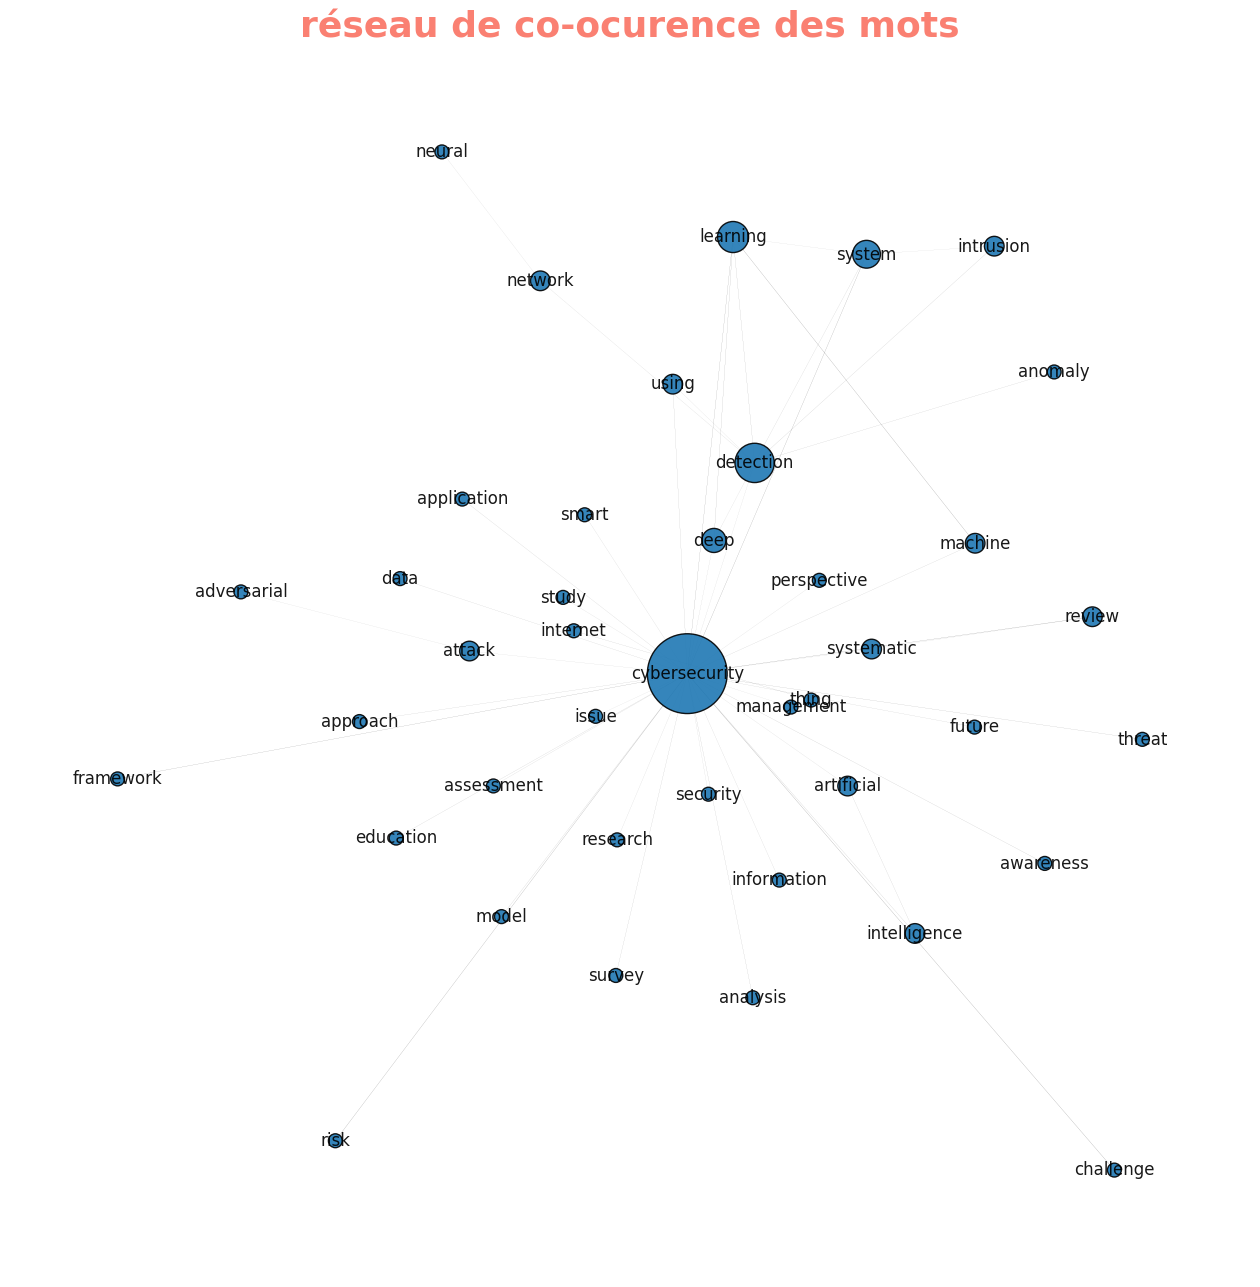

In [64]:
pos_kkl = nx.kamada_kawai_layout(G)
f, ax = plt.subplots(figsize=(16, 16))


d = dict(nx.degree(G))
edges = G.edges()
weights = [G[u][v]['weight']/1000 for u,v in edges]

nx.draw(G, pos_kkl,
        with_labels=True,
        node_size=[v * 100 for v in d.values()],
        nodelist=d.keys(),
        width=weights,
        edge_color='black', #node_color=list(df_skills_stats['core_number']), cmap="coolwarm_r",
        alpha=0.9,
       )
#node_labels = nx.draw_networkx_labels(G, pos_kkl, labels, font_size=10)
# modification du titre
ax.set_title('réseau de co-ocurence des mots',
             fontdict={'fontsize': 26,
            'fontweight': 'bold',
            'color': 'salmon',
            'verticalalignment': 'baseline',
            'horizontalalignment': 'center'},
             loc='center')
# couleur des bords
plt.gca().collections[0].set_edgecolor("#000000")

In [65]:
# Creation du réseau de points
G = nx.Graph()

# Connexion entre les nœuds
for v in bigram_counts.most_common(30):
    G.add_edge(v[0][0], v[0][1], weight=(v[1] * 10))

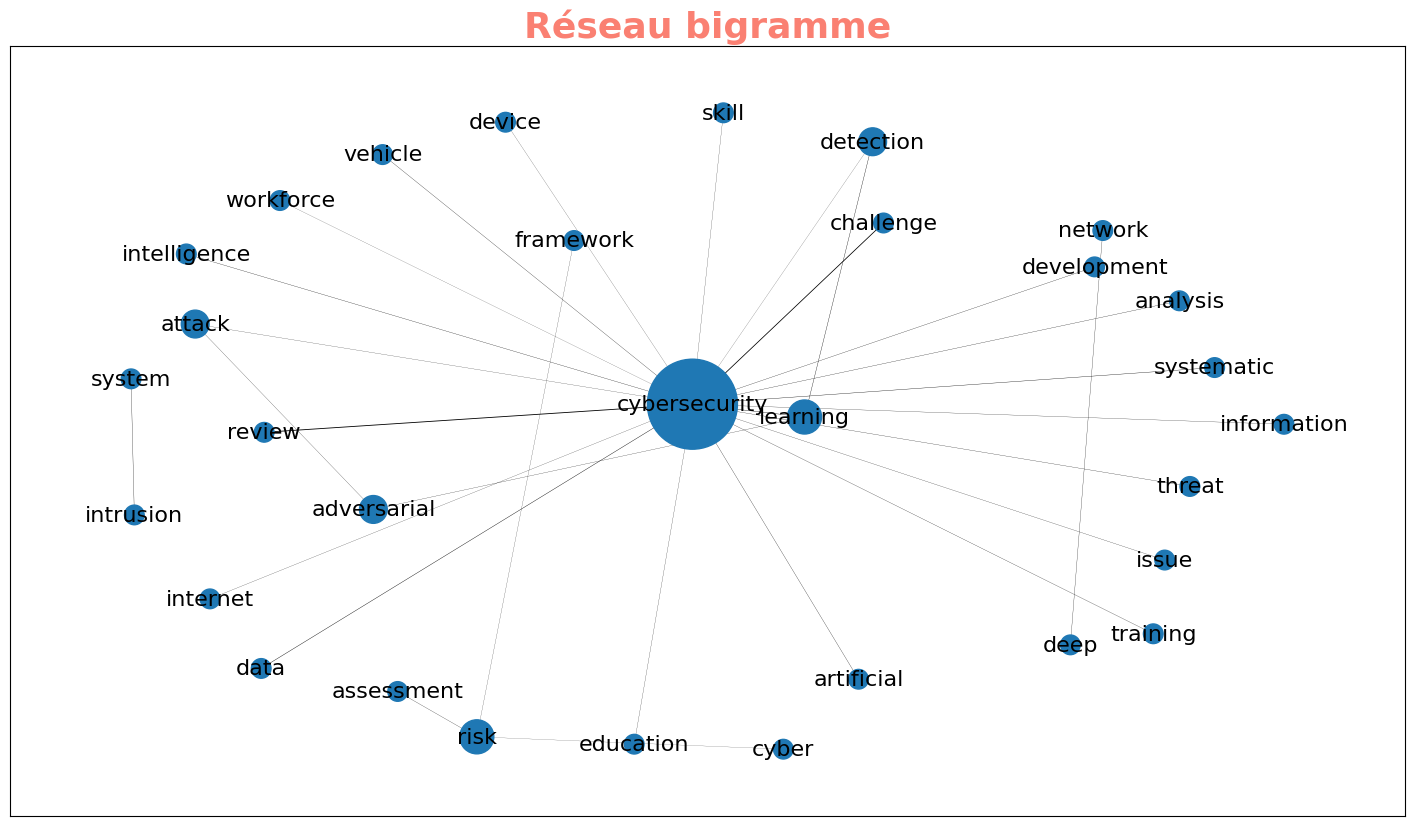

In [66]:
fig, ax = plt.subplots(figsize=(18, 10))

pos = nx.spring_layout(G, k=8)

d = dict(nx.degree(G))
edges = G.edges()
weights = [G[u][v]['weight']/1000 for u,v in edges]
# Réseau de points
nx.draw_networkx(G, pos,
                 font_size=16,
                 width=weights,
                 node_size = [v * 200 for v in d.values()],
                 edge_color='black',
                 with_labels = True,
                 ax=ax)

ax.set_title('Réseau bigramme',
             fontdict={'fontsize': 26,
            'fontweight': 'bold',
            'color': 'salmon',
            'verticalalignment': 'baseline',
            'horizontalalignment': 'center'},
             loc='center')
plt.show()

In [67]:
copy_date_title = date_title
copy_date_title

,pub_date,title,cleaned_title,lemmatized_title,year
0,2023-11-09,ChatGPT and other Large Language Models for Cy...,chatgpt large language models cybersecurity sm...,chatgpt large language model cybersecurity sma...,2023
1,2023-11-02,Emergent (In)Security of Multi-Cloud Environments,emergent insecurity multi-cloud environments,emergent insecurity multi-cloud environment,2023
2,2023-11-02,A Review of Digital Twins and their Applicatio...,review digital twins application cybersecurity...,review digital twin application cybersecurity ...,2023
3,2023-11-06,Hacking Cryptographic Protocols with Advanced ...,hacking cryptographic protocols advanced varia...,hacking cryptographic protocol advanced variat...,2023
4,2023-11-05,The New Frontier of Cybersecurity: Emerging Th...,new frontier cybersecurity emerging threats in...,new frontier cybersecurity emerging threat inn...,2023
...,...,...,...,...,...
2021,2020-01-01,Cybersecurity risks of blockchain technology,cybersecurity risks blockchain technology,cybersecurity risk blockchain technology,2020
2022,2018-01-01,CSIRT s and global cybersecurity: How technica...,csirt global cybersecurity technical experts s...,csirt global cybersecurity technical expert su...,2018
2023,2019-01-01,Curricular foundations for cybersecurity,curricular foundations cybersecurity,curricular foundation cybersecurity,2019
2024,2019-01-01,CNDS-cybersecurity: issues and challenges in A...,cnds-cybersecurity issues challenges asean cou...,cnds-cybersecurity issue challenge asean country,2019


In [68]:
def tokenizing(text):
    # Tokenizing the text
    tokens = nltk.word_tokenize(text)
    return tokens

title_words = []
l1 = []
l2 = []
l3 = []
for i in range(copy_date_title.shape[0]):
    x = copy_date_title[['title']].iloc[i,0].split('###')
    y = tokenizing(copy_date_title[['lemmatized_title']].iloc[i,0])
    z = str(copy_date_title.iloc[i,4])
    l1.extend(x * (len(y)))
    l2.extend(y)
    l3.extend([z] * (len(y)))
    # print(l3)
    # title_words.extend(l)
    # l = []
df_title_words = pd.DataFrame()
df_title_words["titles"] = l1
df_title_words["words"] = l2
df_title_words["year"] = l3

In [69]:
df_title_words

,titles,words,year
0,ChatGPT and other Large Language Models for Cy...,chatgpt,2023
1,ChatGPT and other Large Language Models for Cy...,large,2023
2,ChatGPT and other Large Language Models for Cy...,language,2023
3,ChatGPT and other Large Language Models for Cy...,model,2023
4,ChatGPT and other Large Language Models for Cy...,cybersecurity,2023
...,...,...,...
13829,Ciberseguridad. Presentación del dossier/Cyber...,presentación,2017
13830,Ciberseguridad. Presentación del dossier/Cyber...,del,2017
13831,Ciberseguridad. Presentación del dossier/Cyber...,dossiercybersecurity,2017
13832,Ciberseguridad. Presentación del dossier/Cyber...,introduction,2017


,titles,words,year
0,ChatGPT and other Large Language Models for Cy...,chatgpt,2023
1,ChatGPT and other Large Language Models for Cy...,large,2023
2,ChatGPT and other Large Language Models for Cy...,language,2023
3,ChatGPT and other Large Language Models for Cy...,model,2023
4,ChatGPT and other Large Language Models for Cy...,cybersecurity,2023
...,...,...,...
13829,Ciberseguridad. Presentación del dossier/Cyber...,presentación,2017
13830,Ciberseguridad. Presentación del dossier/Cyber...,del,2017
13831,Ciberseguridad. Presentación del dossier/Cyber...,dossiercybersecurity,2017
13832,Ciberseguridad. Presentación del dossier/Cyber...,introduction,2017


In [70]:
df_title_words.to_csv("title_contain_word.csv", index=False)